In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable
import csv
from scipy import stats
from scipy.fft import fft, fftfreq
import scipy.io
from scipy.io import savemat
from scipy.interpolate import UnivariateSpline 

import os

import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline


import sys
sys.path.append(r'C:/Users/Demag/PycharmProjects/ColdMeasurements/probst_fit')
from resonator_tools.circuit import notch_port

def db2mag(db): return np.power(10, db/20)

select_res = 3

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [97]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi\25nm\PowerScanHighPow10nm\Graphs_data'

files = os.listdir(initial_folder)
for i in range(len(files)):
    if ".fig" in files[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', files[i]) 

[0] -----------> fr_Qi_pow.png
[1] -----------> Merge_fr_pow_res4.mat
[2] -----------> Merge_Qi_pow_res4.mat
[3] -----------> tvsp_res4.mat
[4] -----------> t_vs_p.png


In [113]:
def read_mat(mat):
    k = list(mat.keys())
    print('Keys total:', len(k)-4)
    print(k, '\n')

    print('---------', mat['SampleName'][0], '-----------')
    for en_ki, ki in enumerate(k[3:-1]):
        if ki == 'SampleName' or ki == 'c0' or ki == 'SaveDirFig' or ki == 'Testm' or ki == 'None' or ki == 'SweepEstimate' or ki == 'Year' or ki == 'User': pass
        elif len(shape(mat[ki]))>1:
            if shape(mat[ki])[0] == 1: 
                if len(mat[ki][0])<10: print(ki, '===', mat[ki][0])


    for en_ki, ki in enumerate(k[3:-1]):
        if ki == 'SampleName' or ki == 'c0' or ki == 'SaveDirData' or ki == 'SaveDirFig' or ki == 'Testm' or ki == 'None' or ki == 'SweepEstimate' or ki == 'Year' or ki == 'User': pass
        elif len(shape(mat[ki]))>1:
            if shape(mat[ki])[0] == 1: 
                if len(mat[ki][0])<10: pass
                else: print(ki, shape(mat[ki]), '-len-->', len(mat[ki][0]))


    for en_ki, ki in enumerate(k[3:-1]):
        if ki == 'SampleName' or ki == 'c0' or ki == 'SaveDirData' or ki == 'SaveDirFig' or ki == 'Testm' or ki == 'None' or ki == 'SweepEstimate' or ki == 'Year' or ki == 'User': pass
        elif len(shape(mat[ki]))>1:
            if shape(mat[ki])[0] == 1: pass

            elif shape(mat[ki][:,0]) == 1: print(ki, '===', mat[ki][:,0])


    for en_ki, ki in enumerate(k[3:-1]):
        if ki == 'SampleName' or ki == 'c0' or ki == 'SaveDirData' or ki == 'SaveDirFig' or ki == 'Testm' or ki == 'None' or ki == 'SweepEstimate' or ki == 'Year' or ki == 'User': pass
        elif len(shape(mat[ki]))>1:
            if shape(mat[ki])[0] == 1: pass

            elif shape(mat[ki][:,0]) == 1: print(ki, '===', mat[ki][:,0])
            else: 
                print(ki, '--->', shape(mat[ki]))

            
mat = scipy.io.loadmat(initial_folder+"\\"+files[1])
read_mat(mat)

Keys total: 3
['__header__', '__version__', '__globals__', 'SampleName', 'resonator_number', 'fr_merge', 'power_merge'] 

--------- CoSi_25nm -----------
resonator_number === [3]
fr_merge (1, 332) -len--> 332


In [114]:
fr_merge = mat['fr_merge'][0]
power_merge = mat['power_merge'][0]

In [129]:
mat = scipy.io.loadmat(initial_folder+"\\"+files[2])
read_mat(mat)

Keys total: 3
['__header__', '__version__', '__globals__', 'SampleName', 'resonator_number', 'total_qi', 'total_qi_pow'] 

--------- CoSi_25nm -----------
resonator_number === [3]
total_qi (1, 564) -len--> 564


In [130]:
total_qi = mat['total_qi'][0]
total_qi_pow = mat['total_qi_pow'][0]

In [131]:
mat = scipy.io.loadmat(initial_folder+"\\"+files[3])
read_mat(mat)

Keys total: 3
['__header__', '__version__', '__globals__', 'SampleName', 'resonator_number', 'temp_selected', 'pow_m_selected'] 

--------- CoSi_25nm -----------
resonator_number === [3]
temp_selected (1, 9980) -len--> 9980


In [135]:
temp_plot = mat['temp_selected'][0]
pow_plot = mat['pow_m_selected'][0]

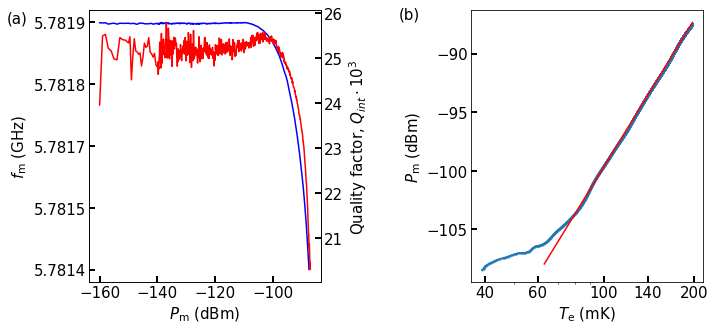

In [226]:
fig, ax = plt.subplots(1, 2, figsize=(11,5))
font = {'size'   : 15}
matplotlib.rc('font', **font)

ax[0].set_xlabel(r'$P_\mathrm{m}$ (dBm)')
ax[0].set_ylabel('$f_\mathrm{m}$ (GHz)')
ax[0].plot(power_merge-80, fr_merge, color='blue')

ticks = np.linspace(min(fr_merge), max(fr_merge),5)
ax[0].set_yticks(ticks, labels = np.array(np.round(ticks,4), dtype=str))

ax2 = ax[0].twinx()


ax2.set_ylabel('Quality factor, $Q_{int}\cdot10^3$')
ax2.plot(total_qi_pow-80, total_qi/1000, color='red')

plt.savefig(initial_folder+"\\"+'fr_Qi_pow.png',  dpi=250, bbox_inches='tight')

ax[0].text(-192, max(fr_merge), "(a)")


ax[1].plot(temp_plot[:-7], pow_plot[:-7], marker = 'o', mfc = 'white', markersize = 1)


ax[1].set_xscale('log')
ax[1].set_ylabel(r'$P_\mathrm{m}$ (dBm)')
ax[1].set_xlabel('$T_\mathrm{e}$ (mK)')



ticks = [20, 40,  60,  100,  140,
               200]
ax[1].set_xticks(ticks, labels = [20, 40,  60,  100,  140,
               200])
ax[1].tick_params(direction='in', length=6, width=2,)
ax[0].tick_params(direction='in', length=6, width=2,)
ax2.tick_params(direction='in', length=6, width=2,)

# ax[1].grid(True)

# fit 
from scipy.optimize import curve_fit
def linear_func(x, a, b):
    return a * x + b

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_func, x, y)
    a = popt[0]
    b = popt[1]
    return a, b

star = 500
temp_selected = temp_plot[750:-star]
pow_m_selected = pow_plot[750:-star]

a, b = linear_fit(10*np.log10(temp_selected), pow_m_selected)
ax[1].plot(temp_plot[0:-100], linear_func(10*np.log10(temp_plot[0:-100]), a, b), 'r')


ax[1].text(20.5, -87, "(b)")
# ax[1].legend(loc = 2)

plt.subplots_adjust(wspace=0.65)

plt.savefig(initial_folder+"\\"+'fr_Qi_pow.png',  dpi=250, bbox_inches='tight')
plt.show()